## Data Analysis on Agricultural Dataset in R

In [5]:
### Overview

In [3]:
# This dataset provides information about crop production in India for a period of 15 years.
#EDA of this dataset would give insights into Indian agriculture status: state-wise,district-wise, crop-wise, area-wise levels of production

### Features in this dataset
state: Name of Indian State (eg, Andhra Pradesh, Punjab e.t.c)

district: Name of district (eg, Godavari , Srikakulam)

crop: Crop produced (e.g. Rice)

year: Year of production 1998-99

season: Season of production (e.g. Rabi, Kharif, All seasons)

area: Area of production in Hectare

production: Crop produced in Tonnes

yield: In Tonnes/Hectare(Returns per Hectare)

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
library(scales)

Warning message:
"package 'scales' was built under R version 3.6.3"

In [3]:
df = read.csv("Agri.csv") 

In [4]:
head(df,5)

state,district,crop,year,season,area,production,yield
ANDHRA PRADESH,ADILABAD,Rice,1998-99,Kharif,66400,152300,2.293675
ANDHRA PRADESH,ADILABAD,Rice,1998-99,Rabi,12200,33500,2.745902
ANDHRA PRADESH,ADILABAD,Rice,1999-00,Kharif,66388,162451,2.446993
ANDHRA PRADESH,ADILABAD,Rice,1999-00,Rabi,10980,26616,2.424044
ANDHRA PRADESH,ADILABAD,Rice,2000-01,Kharif,70645,146235,2.069998


In [5]:
dim(df)

[1] 175628      8

In [6]:
# Column wise Missing values

In [7]:
sapply(df,function(X) {length(which(is.na(X)))})

state   district       crop       year     season       area production 
         0          0          0          0          0          4       2559 
     yield 
      2559

In [8]:
#Droping the raws with NaN values , as it contains only 1.4% of the total data

In [9]:
df<-na.omit(df)

In [10]:
sapply(df,function(X) {length(which(is.na(X)))})

state   district       crop       year     season       area production 
         0          0          0          0          0          0          0 
     yield 
         0

In [11]:
#Droping two rows which showed the value 'Year' under year column

In [12]:
df <- subset(df,year != 'Year')

In [13]:
subset(df,year == 'Year')

state,district,crop,year,season,area,production,yield


In [14]:
dim(df)

[1] 173067      8

In [15]:
# Datatypes of all columns

In [16]:
str(df)

'data.frame':	173067 obs. of  8 variables:
 $ state     : Factor w/ 33 levels "A & N ISLANDS",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ district  : Factor w/ 646 levels "24 PARGANAS (NORTH)",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ crop      : Factor w/ 50 levels "Arecanut","Arhar (Tur)",..: 37 37 37 37 37 37 37 37 37 37 ...
 $ year      : Factor w/ 17 levels "","1998-99","1999-00",..: 2 2 3 3 4 4 5 5 6 6 ...
 $ season    : Factor w/ 6 levels "Autumn","Kharif",..: 2 3 2 3 2 3 2 3 2 3 ...
 $ area      : num  66400 12200 66388 10980 70645 ...
 $ production: num  152300 33500 162451 26616 146235 ...
 $ yield     : num  2.29 2.75 2.45 2.42 2.07 ...


In [17]:
# Bsic Summary of dataset

In [18]:
summary(df)

            state             district             crop             year      
 UTTAR PRADESH :23303   BILASPUR  :   701   Rice     : 11018   2003-04:14385  
 MADHYA PRADESH:16523   AURANGABAD:   627   Maize    :  9851   2002-03:13979  
 KARNATAKA     :13015   TUMKUR    :   583   Moong    :  7154   2007-08:13740  
 BIHAR         :12982   DAVANGERE :   571   Urad     :  6683   2006-07:13444  
 ANDHRA PRADESH:10955   KURNOOL   :   567   Sesamum  :  6641   2008-09:13408  
 ORISSA        :10842   BELLARY   :   566   Groundnut:  6535   2000-01:13325  
 (Other)       :85447   (Other)   :169452   (Other)  :125185   (Other):90786  
        season           area            production            yield          
 Autumn    : 2847   Min.   :2.00e-01   Min.   :0.000e+00   Min.   :    0.000  
 Kharif    :70030   1st Qu.:9.70e+01   1st Qu.:9.900e+01   1st Qu.:    0.501  
 Rabi      :47821   Median :6.78e+02   Median :7.800e+02   Median :    1.000  
 Summer    : 9050   Mean   :1.24e+04   Mean   :2.230

In [19]:
# NUmber of unique values

In [20]:
sapply(subset(df,select = c(1:5)),function(X) {length(unique(X))})

state district     crop     year   season 
      33      646       50       16        6

### This dataset contains information about 50 different agriculture crops cultivated in 6 major cropping seasons.
###Data has the agriculture production details of 646 districts from 33 states.

### 1. Top 5 states in rice production

In [21]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [22]:
RiceProd = subset(df,crop == 'Rice') %>% group_by(state) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE))

In [23]:
head(RiceProd,5)

state,production
WEST BENGAL,169958186
ANDHRA PRADESH,161534612
UTTAR PRADESH,151898372
PUNJAB,132646000
ORISSA,106254062


In [24]:
Rplot = head(RiceProd,5)

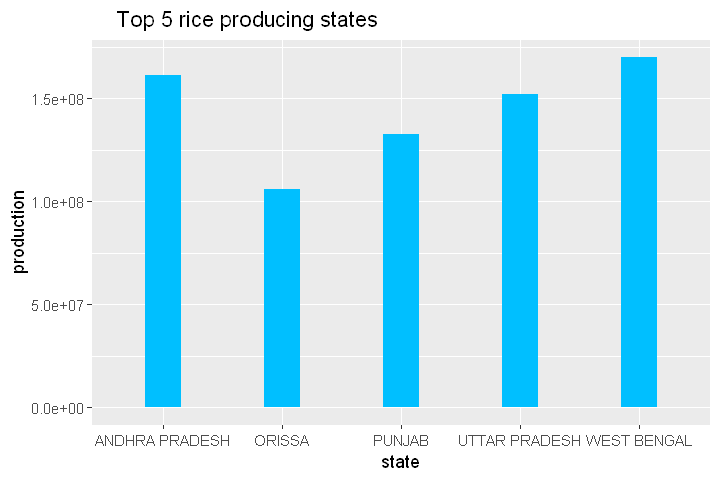

In [25]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(Rplot, aes(x=state, y=production)) + geom_bar(stat = "identity",fill = "deepskyblue",width = 0.3) + labs(title = "    Top 5 rice producing states")

### 2. Rice production trend of Punjab over 15 years

In [26]:
subset(df,crop == 'Rice' & state == 'PUNJAB') %>% group_by(year) %>% summarise(production = sum(production))

year,production
1998-99,7940000
1999-00,8716000
2000-01,9154000
2001-02,8816000
2002-03,8880000
2003-04,9656000
2004-05,10437000
2005-06,10193000
2006-07,9542000
2007-08,9381000


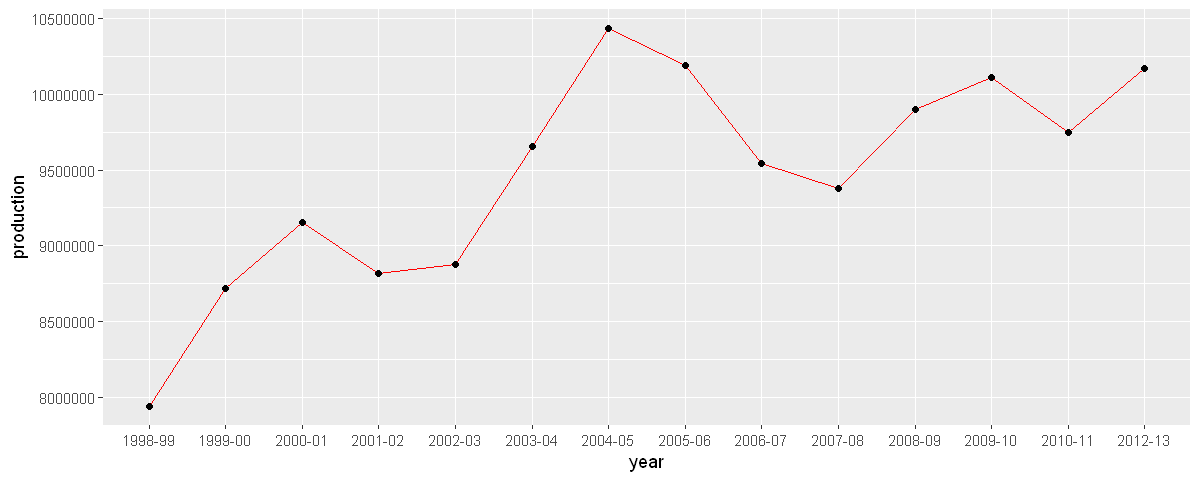

In [27]:
options(repr.plot.width = 10, repr.plot.height = 4)
ggplot(subset(df,crop == 'Rice' & state == 'PUNJAB') %>% group_by(year) %>% summarise(production = sum(production)),aes(x = year,y = production,group = 1)) + geom_line(color="red")+ geom_point()

### 3. Identify the most produced Rabi crop

In [28]:
Rabi = subset(df,season == 'Rabi')

In [29]:
head(sort(table(Rabi$crop),decreasing = TRUE))


            Wheat Rapeseed &Mustard              Gram           Linseed 
             5797              5404              5373              3285 
           Barley            Masoor 
             3072              2851 

In [30]:
# Most produced Rabi crop is wheat

### 4. Five states having maximum agriculture land(area)

In [31]:
area = df.groupby(['state','year']).area.sum()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:19: unexpected '['
1: area = df.groupby([
                      ^


In [ ]:
areadf = df %>% group_by(state,year) %>% summarise(area_sum = sum(area))

In [ ]:
df %>% group_by(state,year) %>% summarise(area_sum = sum(area))

In [ ]:
head(areadf %>% group_by(state) %>% summarise(mean_area = mean(area_sum)) %>% arrange(desc(mean_area,.by_group = TRUE)),5)

In [ ]:
area_plot = head(areadf %>% group_by(state) %>% summarise(mean_area = mean(area_sum)) %>% arrange(desc(mean_area,.by_group = TRUE)),5)

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(area_plot, aes(x=state, y=mean_area)) + geom_bar(stat = "identity",fill = "darkviolet",width = 0.7) + labs(title = "    Top 5 states in Area")

### 5.Most produced crop in Kerala

In [ ]:
kerala = subset(df,state == 'KERALA')


In [ ]:
head(sort(table(kerala$crop),decreasing = TRUE))

In [ ]:
# Rice is the most produced crop in Kerala

### 6.Most produced crop in Maharashtra

In [ ]:
mh = subset(df,state == 'MAHARASHTRA')
head(sort(table(mh$crop),decreasing = TRUE))

In [ ]:
# Sunflower is the most produced crop in Maharashtra

### 7.Most produced crop in Punjab

In [ ]:
punjab = subset(df,state == 'PUNJAB')
head(sort(table(punjab$crop),decreasing = TRUE))

In [ ]:
# Rice is the most produced crop of Punjab

### 8. In which year does the production went to minimum

In [ ]:
yearplot = df %>% group_by(year) %>% summarise(production = sum(production))

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(yearplot,aes(x = year,y = production,group = 1)) + geom_line(linetype = "dashed",color="blue")+ geom_point(color="red", size=3)

In [ ]:
# 2013-2014 has low production

### 9. Top 5 Rabi crops(In terms of production)

In [ ]:
rabi = subset(df,season == 'Rabi')

In [ ]:
head(rabi %>% group_by(crop) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

In [ ]:
rabiplot = head(rabi %>% group_by(crop) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

In [ ]:
ggplot(rabiplot, aes(x=production, y=crop)) + geom_bar(stat = "identity",fill = "tan1",width = 0.7) + labs(title = "    Top 5 Rabi crops")

### 10.Top 5 Kharif producing states

In [ ]:
kharif = subset(df,season == 'Kharif')

In [ ]:
head(kharif %>% group_by(state) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

In [ ]:
kplot = head(kharif %>% group_by(state) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

In [ ]:
ggplot(kplot, aes(x=state, y=production)) + geom_bar(stat = "identity",fill = "yellow4",width = 0.5) + labs(title = "    Top 5 states in Kharif production")

### 12. In Kerala which district is best for rice production

In [ ]:
subset(df,state == 'KERALA' & crop == 'Rice') %>% group_by(district) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE))

In [ ]:
dplot = subset(df,state == 'KERALA' & crop == 'Rice') %>% group_by(district) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE))

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(dplot, aes(x=district, y=production)) + geom_bar(stat = "identity",fill = "slateblue1",width = 0.2) + labs(title = "    District wise rice production of Kerala")

### Maximum rice production in Kerala is in Palakkad District .

### 13.  Identify the crop that gives maximum yield

In [ ]:
head(df %>% group_by(crop) %>%  summarise(yield = sum(yield))  %>%  arrange(desc(yield,.by_group = TRUE)),10)

In [ ]:
# Coconut is the crop that gives maximum yield

### 14. Five least produced crop in India

In [ ]:
head(df %>% group_by(crop) %>%  summarise(production = sum(production))  %>%  arrange(production,.by_group = TRUE),10)
# sorting in default order ie. ascending

### 15. Cardomom production in different states

In [32]:
subset(df,crop == 'Cardamom') %>% group_by(state)  %>%  summarise(production = sum(production))  %>% arrange(desc(production,.by_group = TRUE))

state,production
KERALA,87341.400
KARNATAKA,13214.000
WEST BENGAL,5604.704
TAMIL NADU,3903.000
NAGALAND,1680.000


In [ ]:
cplot = subset(df,crop == 'Cardamom') %>% group_by(state)  %>%  summarise(production = sum(production))  %>% arrange(desc(production,.by_group = TRUE))

In [ ]:
cl = length(cplot$production)

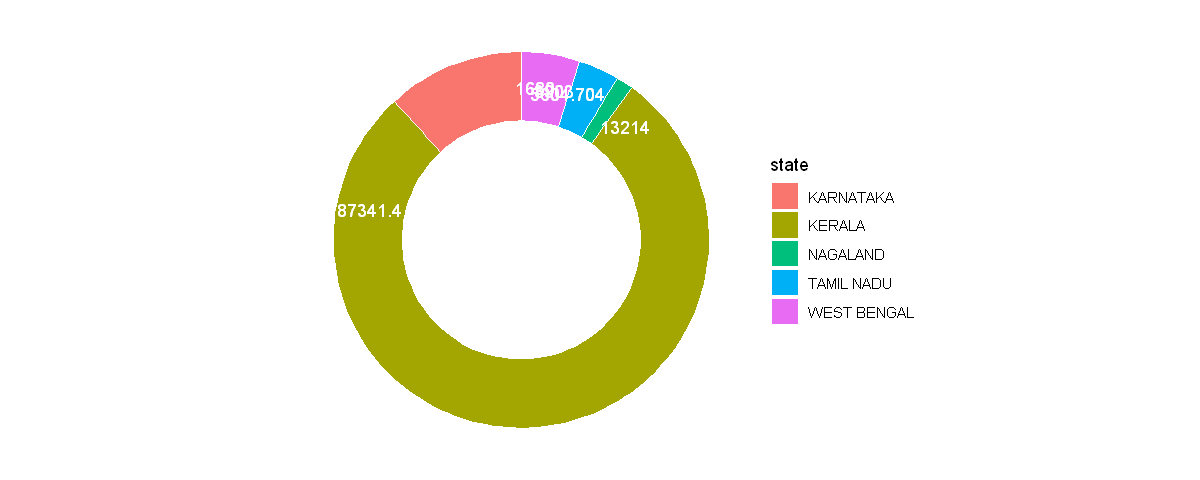

In [43]:
ggplot(cplot, aes(x=2, y=production, fill=state))+geom_bar(stat = "identity",color = "white") + coord_polar("y", start=0) + geom_text(aes(label = production), color = "white") + theme_void() + xlim(0.001, 2.5)

### l6. Five most produced crops in India

In [129]:
head(df %>% group_by(crop) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

crop,production
Coconut,31002905518
Sugarcane,3584729394
Rice,1161929085
Wheat,992622513
Potato,294748002


In [132]:
prod = head(df %>% group_by(crop) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),5)

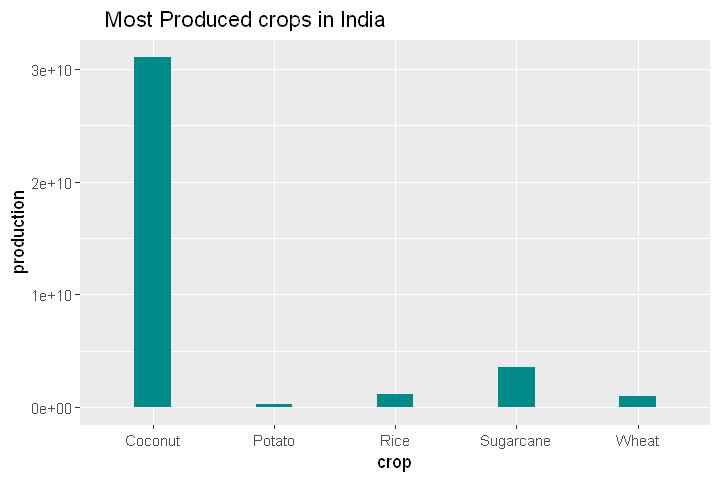

In [135]:
options(repr.plot.width = 6, repr.plot.height = 4)
ggplot(prod, aes(x=crop, y=production)) + geom_bar(stat = "identity",fill = "cyan4",width = 0.3) + labs(title = "    Most Produced crops in India")

### 17. Production of Top 4 Crops over the years

In [136]:
subset(df,crop == 'Coconut') %>%  group_by(year) %>%  summarise(production = sum(production))

year,production
1998-99,128276320
1999-00,129443746
2000-01,1225779815
2001-02,1257743713
2002-03,1291404306
2003-04,1327926197
2004-05,1334953354
2005-06,1019671342
2006-07,1461354699
2007-08,135912487


### 18. 17. As the year 2012- 13 witnessed a low productivity compared to previous years, identity the top 10 better performed crops in that year

In [35]:
head(subset(df,year == '2012-13') %>% group_by(crop) %>%  summarise(yield = sum(yield)) %>%  arrange(desc(yield,.by_group = TRUE)),10)

crop,yield
Coconut,4772.86870
Sugarcane,3451.86437
Potato,522.74697
Rice,243.79503
Maize,193.57454
Tapioca,161.75592
Wheat,150.69738
Dry ginger,110.90701
Groundnut,97.39521
Sweet potato,68.19091


### 19. Per Hector production Graph of various Indian states

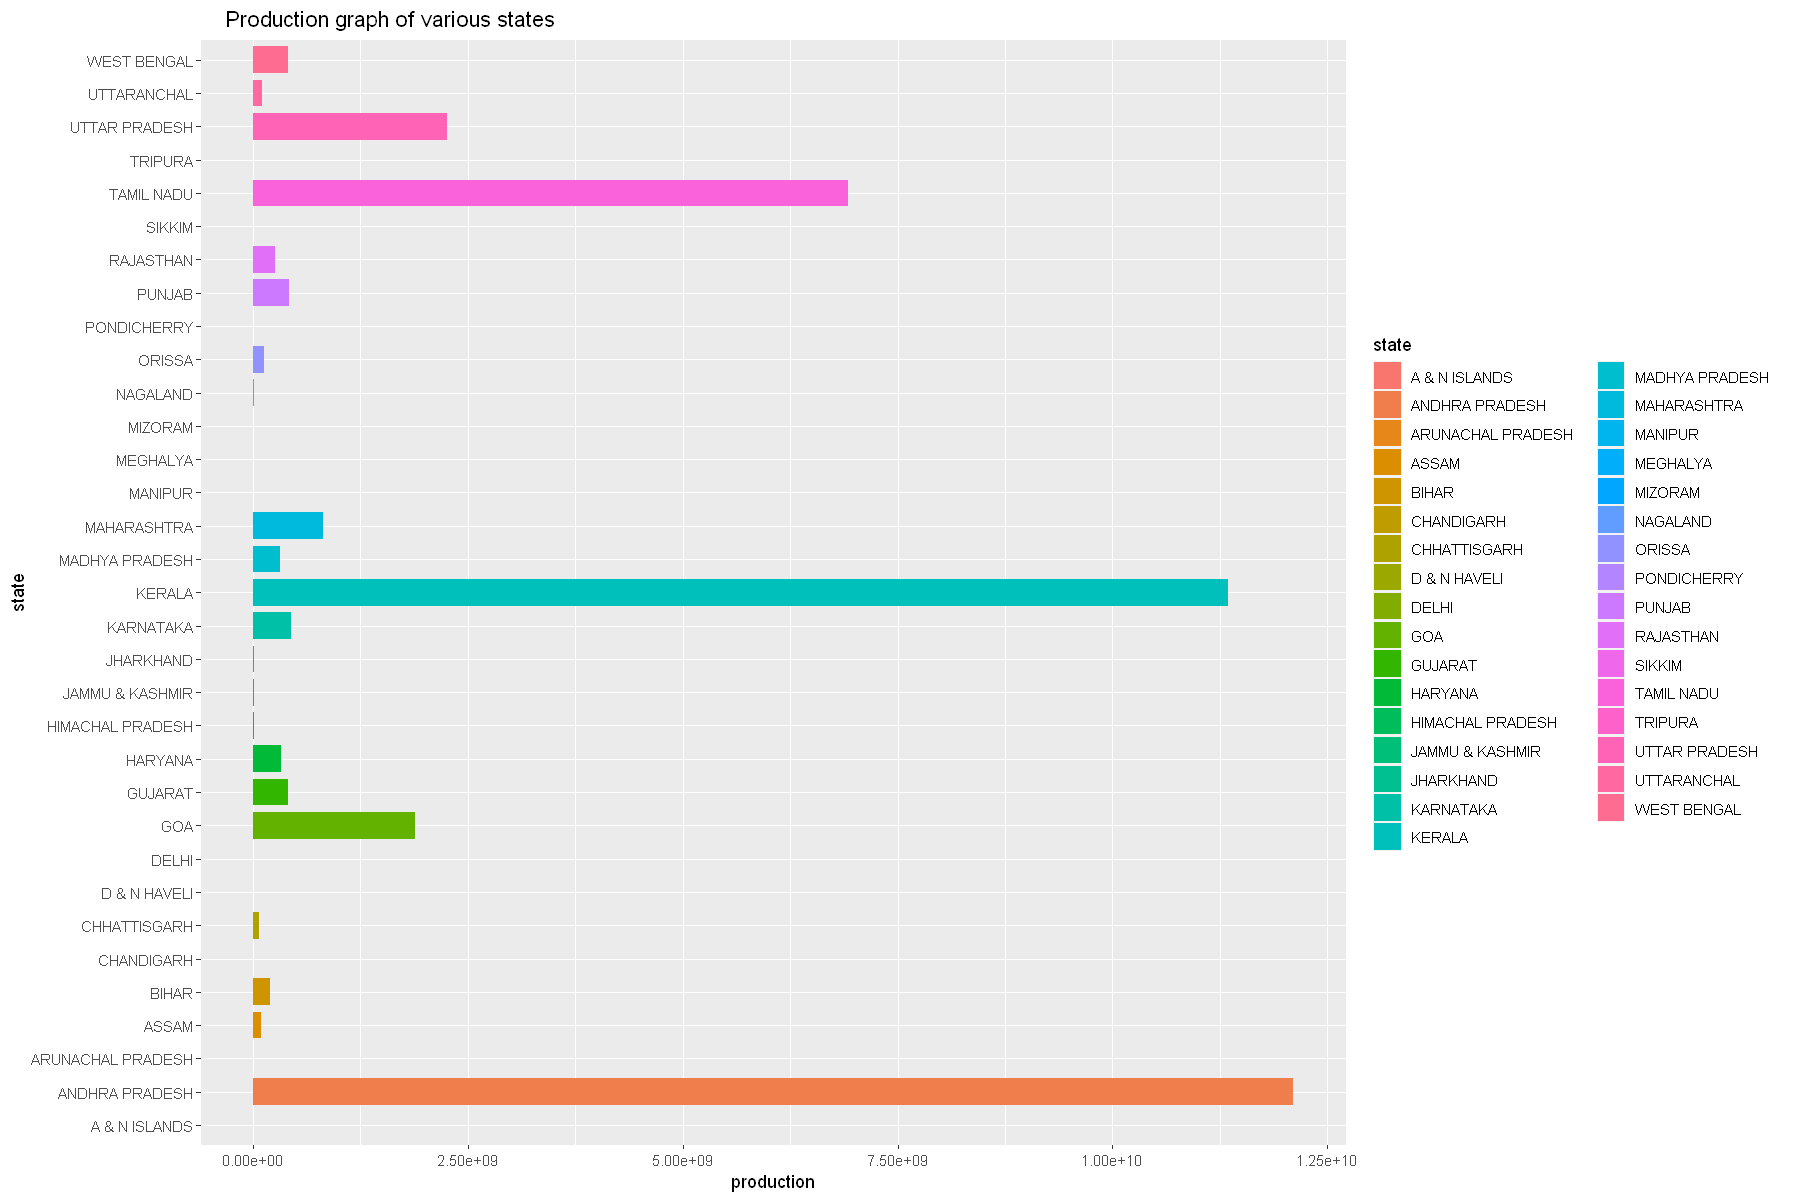

In [51]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df, aes(x=production, y=state,fill = state)) + geom_bar(stat = "identity",width = 0.8) + labs(title = "    Production graph of various states")

### Goa tops the list as it has maximum per hector production(As the state is small per hector production will be more)¶

### 20.Percentage production of top 10 districts

In [61]:
per = head(df %>% group_by(district) %>%  summarise(production = sum(production)) %>%  arrange(desc(production,.by_group = TRUE)),10)

In [62]:
S = sum(per$production)

In [63]:
per$percentage_production  =  lapply(per$production,function(X) {(X/S)*100})

In [64]:
per

district,production,percentage_production
EAST GODAVARI,6026257557,30.87258
WEST GODAVARI,2694426698,13.80357
MALAPPURAM,1875909405,9.610302
KOZHIKODE,1633130971,8.366546
Goa,1377570619,7.057308
COIMBATORE,1285224541,6.584218
SRIKAKULAM,1251505130,6.411473
KANNUR,1181464643,6.052655
THRISSUR,1109858015,5.685813
TRIVANDRUM,1084428156,5.555536


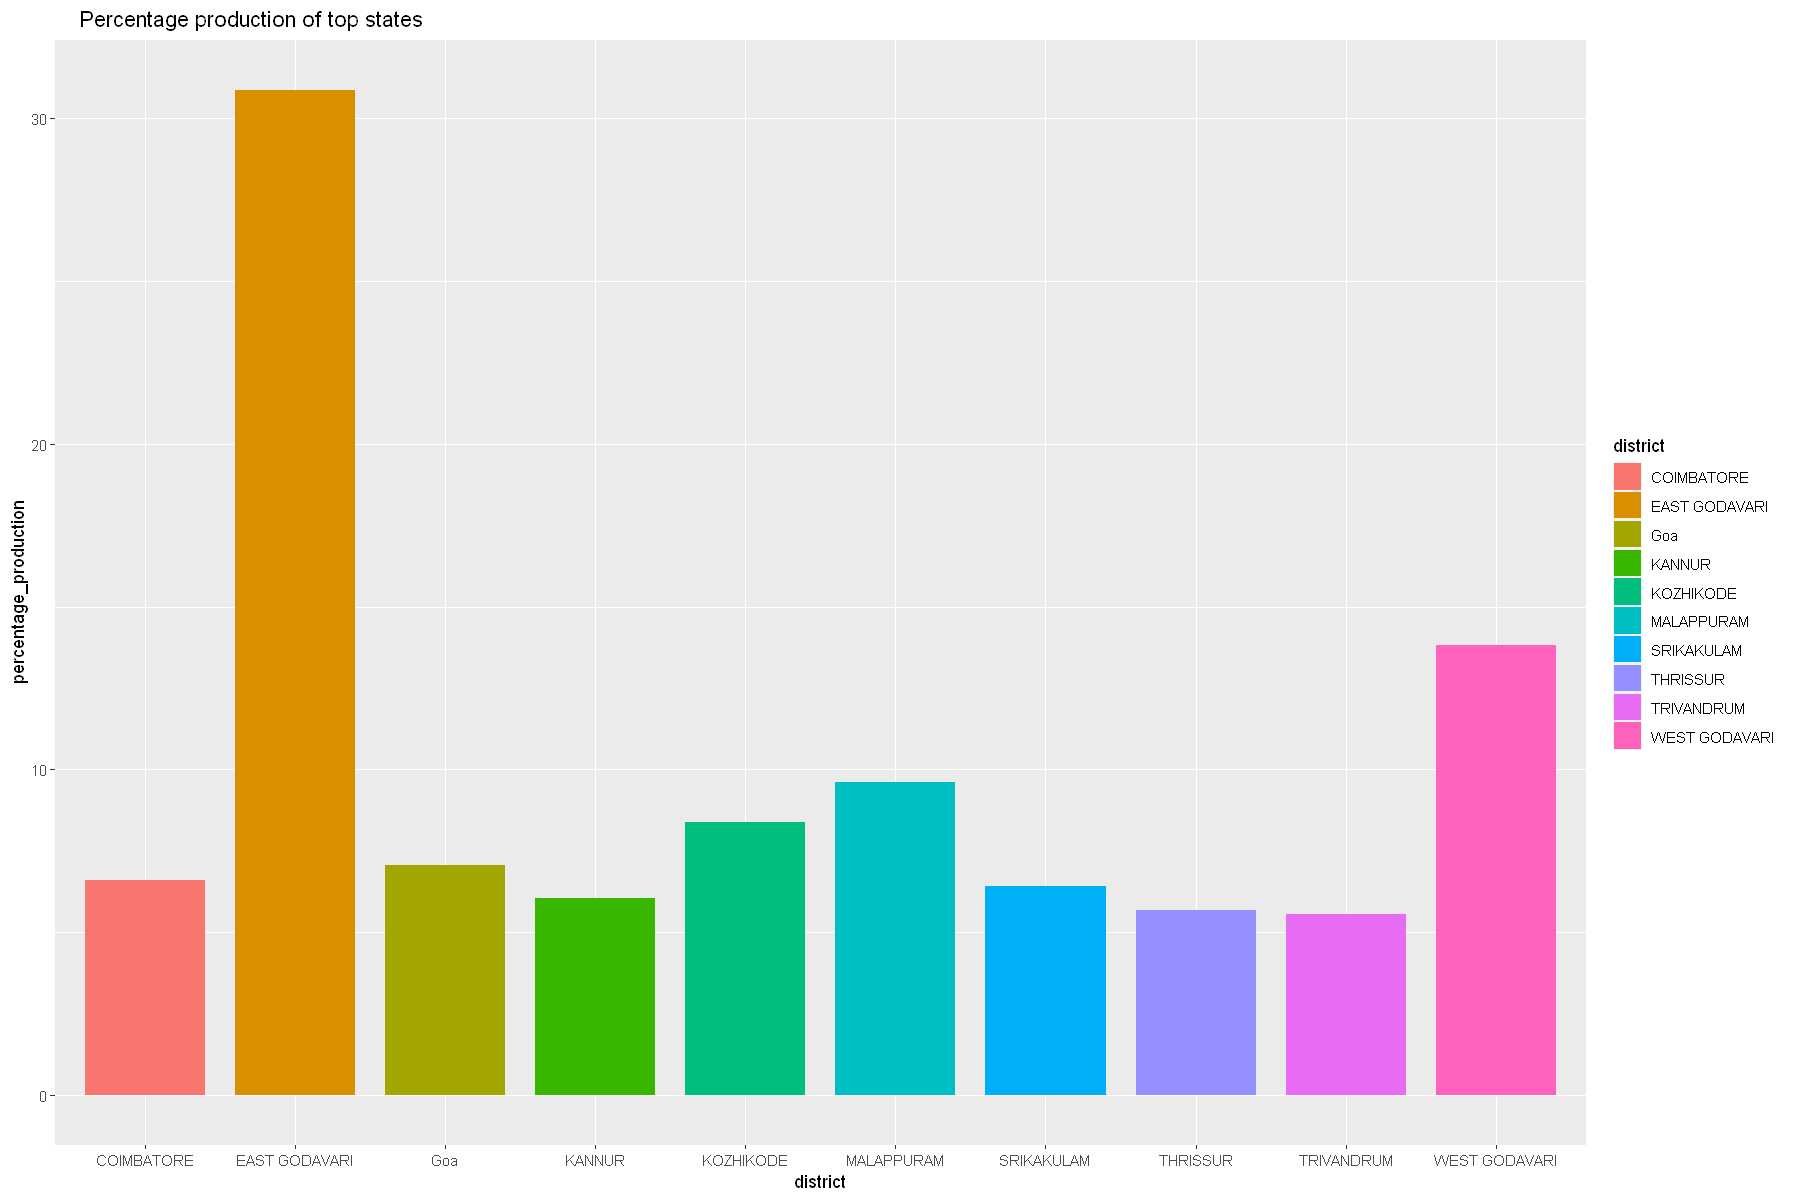

In [66]:
ggplot(per, aes(x=district, y=percentage_production,fill = district)) + geom_bar(stat = "identity",width = 0.8) + labs(title = "    Percentage production of top states")

### 21.  Top 3 crops in overall production

In [68]:
head(df %>% group_by(crop) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)),3)

crop,production
Coconut,31002905518
Sugarcane,3584729394
Rice,1161929085


### 22.  Season wise production of Uttar Pradesh

In [69]:
subset(df,state = 'UTTAR PRADESH') %>% group_by(season) %>% summarise(production = sum(production)) %>% arrange(desc(production,.by_group = TRUE)) 

season,production
Whole year,33940973240
Kharif,2810959845
Rabi,1453250578
Winter,244573272
Summer,106970724
Autumn,41819716


## Final Conclusion

#### Started with 175611 samples with 8 columns.
#### Production and Yield columns had 2559 missing values(1.4% of total data), which was dropped.
#### Final dataset has 173050 sample and 8 columns.
#### Top states contributing to the dataset are Uttar Pradesh, Madhya Pradesh,Rajasthan,Maharashtra & AP.
#### Production wise top crops are Coconut,Sugarcane and Rice.
#### Total production hit peak in 2011-12.
#### Top producing state Uttar Pradesh has more crop production in Kharif and Rabi seasons.
#### 90% cultivation of the least producing crop, Cardomom happens in South Indian states like Tamil Nadu,Kerala & Karnataka.
#### Correlation between production and Yield shows rate of production is directly proportional to rate of yield.

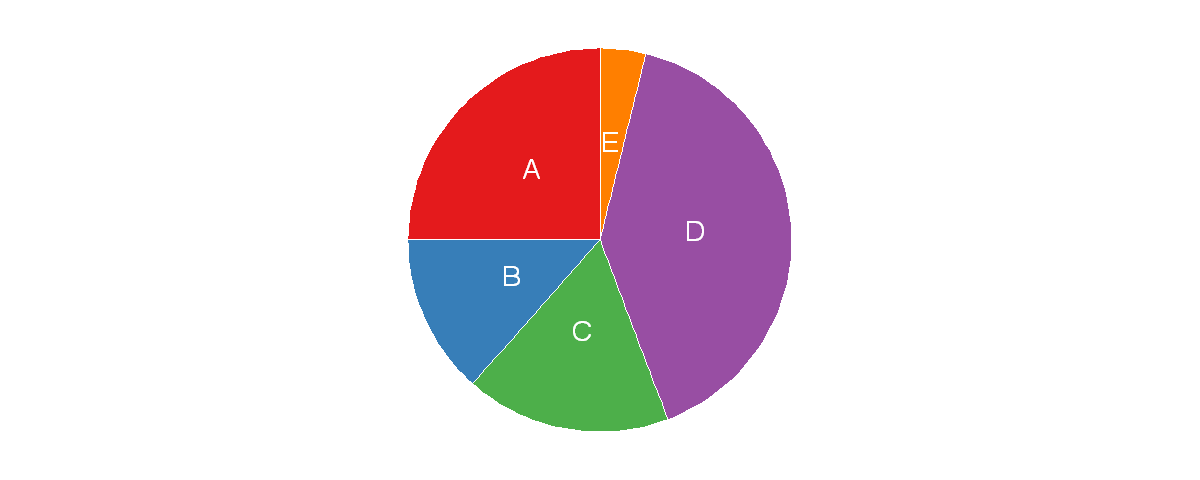

In [102]:
# Create Data
data <- data.frame(
  group=LETTERS[1:5],
  value=c(13,7,9,21,2)
)

# Compute the position of labels
data <- data %>% 
  arrange(desc(group)) %>%
  mutate(prop = value / sum(data$value) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )

# Basic piechart
ggplot(data, aes(x="", y=prop, fill=group)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="none") +
  
  geom_text(aes(y = ypos, label = group), color = "white", size=6) +
  scale_fill_brewer(palette="Set1")


In [ ]:
ggplot(df, aes(x="", y=value, fill=group))+
geom_bar(width = 1, stat = "identity")

In [211]:
table(df$crop)


             Arecanut           Arhar (Tur)                 Bajra 
                 1108                  5460                  4269 
               Banana                Barley          Black pepper 
                 2295                  3128                   591 
             Cardamom             Cashewnut           Castor seed 
                  264                   619                  2625 
              Coconut             Coriander          Cotton(lint) 
                 1471                  2533                  3274 
         Dry chillies            Dry ginger                Garlic 
                 4811                  2410                  2446 
                 Gram             Groundnut             Guar seed 
                 5539                  6535                   798 
            HorseGram                 Jowar                  Jute 
                 2689                  5401                   964 
               Kesari               Linseed                 M

In [203]:
a = 10

In [208]:
cat("Hiii", a , "hello")

Hiii 10 hello

In [ ]:
2.

In [30]:
y <- c(1, seq(5))

In [31]:
y

[1] 1 1 2 3 4 5